---
## Milestone 2

- Nama              : Kevin Hibatul
- Batch             : HCK-035

**Objective** :
Milestone 2 ini bertujuan untuk memberikan pemahaman menyeluruh mengenai konsep Machine Learning, mulai dari tahap persiapan data hingga penerapan model. Pada milestone ini, data akan diproses dan dipersiapkan agar siap digunakan dalam pendekatan Supervised Learning, baik untuk kasus klasifikasi maupun regresi. Selanjutnya, model akan diimplementasikan dan dievaluasi performanya, kemudian dilakukan hyperparameter tuning serta perbaikan model untuk memperoleh hasil yang optimal. Pada tahap akhir, model terbaik akan di-deploy sehingga dapat digunakan dalam bentuk aplikasi atau sistem yang siap dimanfaatkan oleh pengguna.

---

# Introduction

### Latar Belakang

Mobil bekas menjadi pilihan banyak masyarakat di Australia karena harganya yang lebih terjangkau dibandingkan mobil baru, namun penentuan harga jualnya sering kali menjadi tantangan. Harga mobil bekas dipengaruhi oleh berbagai faktor seperti merek, tahun produksi, jarak tempuh, kondisi kendaraan, serta dinamika permintaan dan pasokan pasar, sehingga sulit dievaluasi secara objektif. Ketidakseimbangan informasi ini berpotensi menyebabkan kerugian bagi pembeli maupun penjual akibat harga yang tidak sesuai nilai pasar. Oleh karena itu, diperlukan pendekatan berbasis data historis dan Machine Learning untuk membantu menilai harga mobil bekas secara lebih objektif, akurat, dan terpercaya dalam mendukung pengambilan keputusan.

### Problem Statement

Pasar mobil bekas di Australia memiliki tantangan dalam menentukan harga yang wajar dan kompetitif karena variasi kondisi kendaraan, banyaknya penjual, dan dinamika permintaan-pasokan. Hal ini menyebabkan pembeli atau penjual sering mengalami kerugian finansial karena harga yang ditetapkan tidak sesuai nilai pasarnya. Aplikasi yang akan dibangun bertujuan menjadi alat bantu untuk menilai harga mobil bekas berbasis data historis, sehingga keputusan membeli atau menjual menjadi lebih objektif dan terpercaya.

# Import Library

In [1]:
# Data Loading
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Supervised Learning Models (Regression)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Saving
import joblib


# Data Loading

In [2]:
# Loading Dataset

df = pd.read_csv('P1M2_Kevin_Hibatul.csv')

# Tampilkan 5 data teratas
df.head()


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
0,11530130,2010 Toyota Rukus Build 2 AZE151R,9999,Toyota,Rukus,Build 2,AZE151R,2010,263000,Wagon,Automatic,Unleaded Petrol,Used,2362,Grey,5
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
2,12321855,2021 Mercedes-Benz Valente 116 CDI MWB RWD 447...,79990,Mercedes-Benz,Valente,116 CDI MWB RWD,447 MY21,2021,24,Wagon,Automatic,Diesel,New In Stock,2143,Black,8
3,12346971,2010 Mercedes-Benz E250 CDI Avantgarde 207,34990,Mercedes-Benz,E250,CDI Avantgarde,207,2010,120579,Cabriolet,Automatic,Diesel,Used,2143,Black,4
4,12363884,2016 Holden Cruze CD JH MY16,15990,Holden,Cruze,CD,JH MY16,2016,72506,Sportswagon,Automatic,Unleaded Petrol,Used,1796,White,5


In [3]:
# Cek info dataset
print("\n--- Info Dataset ---")
df.info()


--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                17048 non-null  int64 
 1   Name              17048 non-null  object
 2   Price             17048 non-null  int64 
 3   Brand             17048 non-null  object
 4   Model             17048 non-null  object
 5   Variant           17048 non-null  object
 6   Series            17048 non-null  object
 7   Year              17048 non-null  int64 
 8   Kilometers        17048 non-null  int64 
 9   Type              17048 non-null  object
 10  Gearbox           17048 non-null  object
 11  Fuel              17048 non-null  object
 12  Status            17048 non-null  object
 13  CC                17048 non-null  int64 
 14  Color             17048 non-null  object
 15  Seating Capacity  17048 non-null  int64 
dtypes: int64(6), object(10)
memory usage

Dataset ini terdapat 16 coloums dan 17048 baris, tidak di temukan nilai kosong (missing value),coloumn berbentuk kategorikal dan numerikal hampir seimbang tidak ada yang mendominasi sudah baik untuk digunakan untuk analisis dan permodelan

In [4]:
# Cek jumlah data yang duplikat
df.duplicated().sum()

0

Dataset ini tidak ada data yang duplikat sudah sangat baik

In [5]:
# Cek missing value
print("\n--- Cek Missing Value ---")
print(df.isnull().sum())


--- Cek Missing Value ---
ID                  0
Name                0
Price               0
Brand               0
Model               0
Variant             0
Series              0
Year                0
Kilometers          0
Type                0
Gearbox             0
Fuel                0
Status              0
CC                  0
Color               0
Seating Capacity    0
dtype: int64


Cek kembali Missing Value, data set ini tidak ada nilai yang kosong

In [6]:
# Statistik deskriptif kolom numerik
df.describe()


,ID,Price,Year,Kilometers,CC,Seating Capacity
count,1.704800e+04,17048.000000,17048.000000,1.704800e+04,17048.000000,17048.000000
mean,1.279027e+07,36777.778038,2015.481288,1.032314e+05,2491.830303,5.115849
std,5.051111e+04,30305.015328,4.721591,8.041313e+04,881.985562,1.121791
min,1.153013e+07,1000.000000,1989.000000,1.000000e+00,875.000000,2.000000
25%,1.275715e+07,18800.000000,2013.000000,4.450225e+04,1987.000000,5.000000
50%,1.280207e+07,29990.000000,2016.000000,8.845400e+04,2354.000000,5.000000
75%,1.283131e+07,45990.000000,2019.000000,1.488735e+05,2981.000000,5.000000
max,1.285246e+07,999000.000000,2022.000000,2.700000e+06,7300.000000,14.000000


Dataset memiliki karakteristik yang beragam dengan variasi harga, jarak tempuh, dan spesifikasi kendaraan yang cukup besar. Terdapat indikasi kuat adanya outlier pada fitur harga dan jarak tempuh yang perlu ditangani sebelum pemodelan. Secara keseluruhan, dataset ini cukup kaya dan relevan untuk membangun model prediksi harga mobil bekas berbasis machine learning.

In [7]:
# Copy dataset untuk preprocessing selanjutnya
df1 = df.copy()


# Exploratory Data Analysis (EDA)

### Mobil Dengan Harga Tertinggi

In [8]:
# Mobil dengan harga di atas persentil 95
high_price_cars = df[df['Price'] > df['Price'].quantile(0.95)]
high_price_cars.head()


,ID,Name,Price,Brand,Model,Variant,Series,Year,Kilometers,Type,Gearbox,Fuel,Status,CC,Color,Seating Capacity
1,12190570,2021 Mercedes-Benz V 250 D Avantgarde MWB 447 ...,117990,Mercedes-Benz,V,250 D Avantgarde MWB,447 MY21,2021,19,Wagon,Automatic,Diesel,New In Stock,2143,Black,7
48,12576018,2020 Toyota Landcruiser LC200 VX (4X4) VDJ200R,119985,Toyota,Landcruiser,LC200 VX (4X4),VDJ200R,2020,50943,Wagon,Automatic,Diesel,Used,4461,White,7
54,12597077,2021 Toyota Landcruiser 70 Series GXL VDJ79R,169990,Toyota,Landcruiser 70 Series,GXL,VDJ79R,2021,1008,Double Cab Chassis,Manual,Diesel,Used,4461,Blue,5
68,12637483,2010 Porsche Boxster Spyder 987 MY11,129900,Porsche,Boxster,Spyder,987 MY11,2010,66147,Roadster,Automatic,Premium Unleaded Petrol,Used,3436,Black,2
74,12652381,2021 Toyota Hilux Rugged X (4X4) GUN126R,85000,Toyota,Hilux,Rugged X (4X4),GUN126R,2021,12000,Double Cab Pick Up,Automatic,Diesel,New In Stock,2753,White,5


Hasil menunjukkan bahwa hanya sebagian kecil data yang memiliki harga jauh di atas mayoritas mobil lainnya. Mobil-mobil ini merepresentasikan segmen harga tinggi di pasar mobil bekas dan berpotensi menjadi outlier. Keberadaan data ini penting untuk diperhatikan karena dapat memengaruhi proses pelatihan model regresi jika tidak ditangani dengan baik

### Rata- Rata Harga Per Tahun

In [9]:
# Mengelompokkan data berdasarkan tahun kendaraan
# lalu menghitung rata-rata harga mobil pada setiap tahun
price_by_year = (
    df.groupby('Year')['Price']
    .mean()
    .reset_index()
)
# Menampilkan 5 data pertama untuk melihat tren awal harga per tahun
price_by_year.head()


,Year,Price
0,1989,84451.50
1,1990,6949.50
2,1991,3950.00
3,1992,4888.00
4,1993,18799.75


Hasil pengelompokan menunjukkan bahwa rata-rata harga mobil berbeda untuk setiap tahun produksi. Hal ini mengindikasikan bahwa usia kendaraan memiliki hubungan dengan nilai jual mobil bekas, di mana tahun produksi berpotensi menjadi salah satu faktor penting dalam penentuan harga.

**Visualisasi**

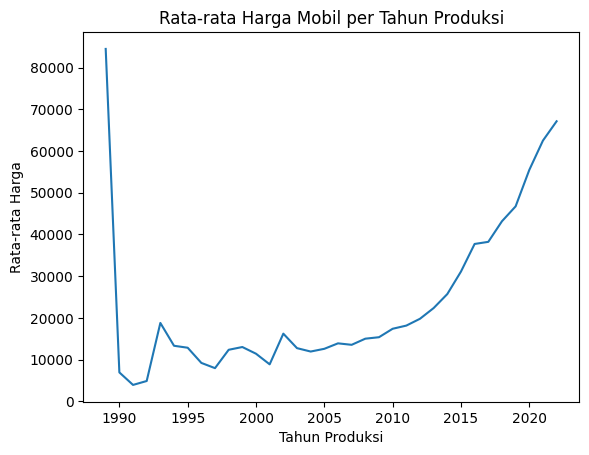

In [10]:
plt.figure()
plt.plot(price_by_year['Year'], price_by_year['Price'])
plt.title('Rata-rata Harga Mobil per Tahun Produksi')
plt.xlabel('Tahun Produksi')
plt.ylabel('Rata-rata Harga')
plt.show()


Visualisasi tren rata-rata harga berdasarkan tahun produksi memperlihatkan adanya pola perubahan harga seiring waktu. Pola ini menunjukkan bahwa model regresi perlu mempertimbangkan fitur tahun produksi untuk menangkap dinamika harga mobil bekas secara lebih akurat.

### Rata-Rata Harga Berdasarkan Gearbox

In [11]:
# Mengelompokkan data berdasarkan jenis Gearbox
# untuk mengetahui perbedaan rata-rata harga mobil
price_by_transmission = (
    df.groupby('Gearbox')['Price']
    .mean()
    .reset_index()
)
# Menampilkan rata-rata harga mobil untuk setiap jenis transmisi
price_by_transmission


,Gearbox,Price
0,AWD,81667.461538
1,Automatic,38076.585883
2,Front,58254.750000
3,Manual,28614.838921
4,Rear,129160.000000


Perbedaan rata-rata harga antar jenis Gearbox menunjukkan bahwa karakteristik kendaraan tidak hanya dipengaruhi oleh faktor numerik, tetapi juga oleh fitur kategorikal. Informasi ini menegaskan bahwa fitur transmisi relevan untuk dimasukkan ke dalam model melalui proses encoding

**Visualisasi**

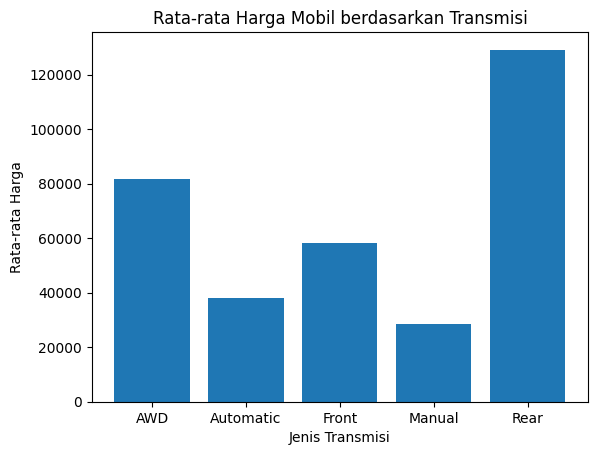

In [12]:
plt.figure()
plt.bar(
    price_by_transmission['Gearbox'],
    price_by_transmission['Price']
)
plt.title('Rata-rata Harga Mobil berdasarkan Transmisi')
plt.xlabel('Jenis Transmisi')
plt.ylabel('Rata-rata Harga')
plt.show()


### Top 5 Merek dengan Jumlah Mobil Terbanyak

In [13]:
# Menghitung jumlah kemunculan setiap merek mobil
# untuk mengetahui merek yang paling banyak dijual di dataset
top_brands = (
    df.groupby('Brand')
    .size()
    .sort_values(ascending=False)
    .head(5)
)
# Menampilkan 5 merek dengan jumlah data terbanyak
top_brands


Brand
Toyota     2768
Holden     1505
Ford       1490
Mazda      1167
Hyundai    1087
dtype: int64

Hasil pengelompokan merek menunjukkan bahwa beberapa merek memiliki jumlah data yang lebih dominan dibandingkan merek lainnya. Ketimpangan distribusi ini perlu diperhatikan karena dapat memengaruhi pembelajaran model dan interpretasi hasil prediksi, terutama untuk merek dengan jumlah observasi yang terbatas.

**Visualisasi**

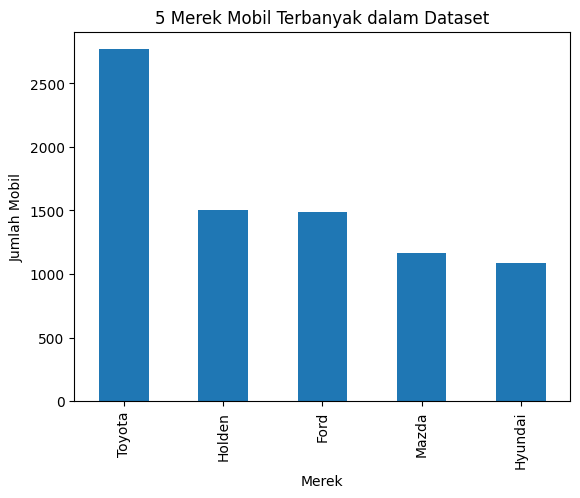

In [14]:
plt.figure()
top_brands.plot(kind='bar')
plt.title('5 Merek Mobil Terbanyak dalam Dataset')
plt.xlabel('Merek')
plt.ylabel('Jumlah Mobil')
plt.show()


### Distribusi Harga berdasarkan Tahun Kendaraan

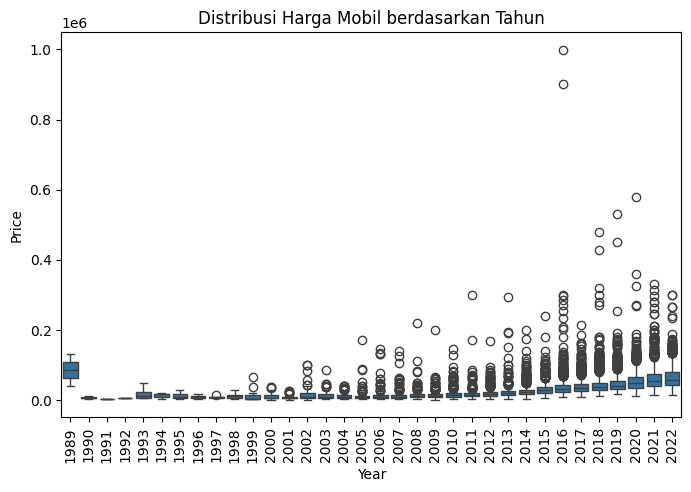

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Year', y='Price', data=df)
plt.xticks(rotation=90)
plt.title('Distribusi Harga Mobil berdasarkan Tahun')
plt.show()


Mobil dengan tahun yang lebih baru cenderung memiliki harga yang lebih tinggi. Namun, terdapat variasi harga yang cukup besar pada tahun tertentu, yang menunjukkan bahwa faktor lain seperti merek dan kondisi kendaraan juga berpengaruh

### Hubungan Kilometer Tempuh vs Harga Mobil

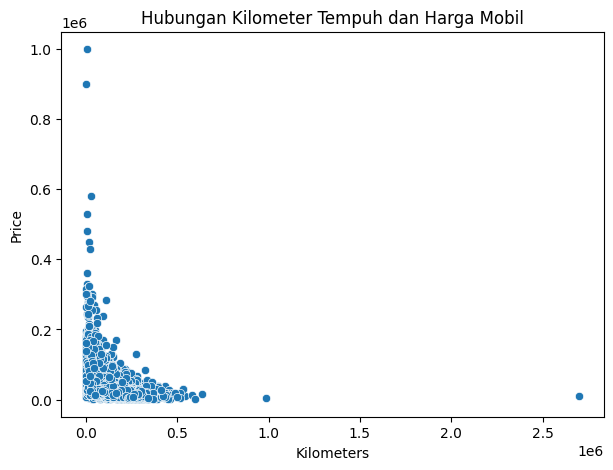

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Kilometers', y='Price', data=df)
plt.title('Hubungan Kilometer Tempuh dan Harga Mobil')
plt.show()


Terlihat tren negatif antara kilometer tempuh dan harga mobil, di mana mobil dengan jarak tempuh lebih rendah cenderung memiliki harga yang lebih tinggi. Outlier pada kilometer tinggi mengindikasikan kendaraan dengan pemakaian ekstrem.

### Rata-rata Harga Mobil berdasarkan Seating Capacity

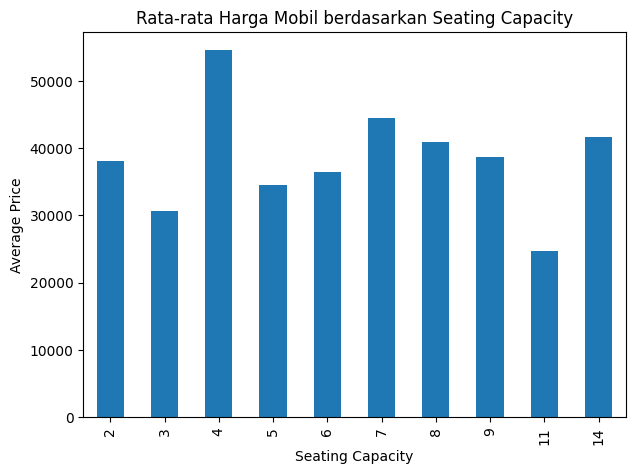

In [17]:
avg_price_seat = df.groupby('Seating Capacity')['Price'].mean()

plt.figure(figsize=(7,5))
avg_price_seat.plot(kind='bar')
plt.title('Rata-rata Harga Mobil berdasarkan Seating Capacity')
plt.ylabel('Average Price')
plt.show()


Mobil dengan kapasitas tempat duduk tidak terlalu mempengaruhi harga karena terlihat pada visualisasi di atas mobil dengan 4 capacity memiliki harga paling tinggi daripada yang lain

# Feature Engineering

### Check Cardinality

In [18]:
# Cek cardinality
def cardinality_check_sorted_values(data, list_cols):
    """
    
    Function ini berfungsi untuk mengecek apakah ada kolom yang memiliki high cardinality atau low cardinality
    
    """
    raw_unique = []

    for col in list_cols:
        unique_vals = sorted(data[col].unique())
        row = [col, len(unique_vals), unique_vals]
        raw_unique.append(row)

    result = pd.DataFrame(raw_unique, columns=['Nama kolom', 'jumlah nilai unique', 'nilai unique'])
    return result

pd.set_option('display.max_colwidth', None)

cardinality_check_sorted_values(df, df.columns)


,Nama kolom,jumlah nilai unique,nilai unique
0,ID,17048,"[11530130, 12190570, 12321855, 12346971, 12363884, 12366036, 12370057, 12381448, 12382945, 12382946, 12382955, 12382958, 12403536, 12405893, 12410238, 12420343, 12428021, 12428397, 12428846, 12434519, 12434520, 12435381, 12436098, 12447932, 12459013, 12472693, 12477167, 12481004, 12484400, 12493596, 12501281, 12519036, 12529077, 12529374, 12531076, 12536654, 12537491, 12537802, 12544469, 12545918, 12557383, 12562714, 12563015, 12563560, 12565963, 12574189, 12574238, 12574243, 12576018, 12577149, 12577352, 12589141, 12594364, 12594410, 12597077, 12602872, 12613034, 12613287, 12620063, 12620066, 12621216, 12628582, 12631067, 12631219, 12631768, 12633579, 12634121, 12636809, 12637483, 12644713, 12646867, 12647010, 12648490, 12650689, 12652381, 12653754, 12656584, 12657267, 12658279, 12660816, 12662362, 12662608, 12664047, 12667166, 12668458, 12669846, 12670312, 12674429, 12675012, 12675520, 12676280, 12677391, 12677779, 12678997, 12679111, 12680408, 12680749, 12682299, 12682458, 12682526, ...]"
1,Name,8575,"[1989 Holden Commodore Berlina VN, 1989 Toyota Landcruiser (4X4) HJ75RP, 1990 Nissan Patrol ST (4X4) GQ, 1990 Toyota Corolla Twin CAM AE92, 1991 Ford Falcon S EB, 1991 Ford Laser GL KH, 1992 Ford Telstar Ghia AX, 1993 Ford Capri XR2 SC, 1993 Ford Falcon S XR6 ED, 1993 Holden Commodore SS Vpii, 1993 Mitsubishi Starwagon GL SH, 1994 Holden Commodore Executive VR, 1994 Holden Commodore SS VR, 1994 Toyota Landcruiser Blue Marlin (4X4) FZJ80, 1995 Ford Falcon Futura EF, 1995 Ford Festiva GLI WB, 1995 Ford Laser LXI Liata KJ, 1995 Holden Statesman V6 VS, 1995 Holden Statesman V8 VS, 1995 Toyota Corolla CSI AE101R, 1995 Toyota Landcruiser RV LWB (4X4) HZJ75RV, 1996 Ford Fairlane Ghia NL, 1996 Ford Falcon XR6 Efii, 1996 Holden Commodore Executive VS, 1996 Jeep Grand Cherokee Laredo (4X4) ZG, 1996 Mitsubishi Pajero GLS LWB (4X4) NK, 1996 Toyota Landcruiser Prado GXL (4X4) VZJ95R, 1996 Toyota Landcruiser Prado Grande VX (4X4) VZJ95R, 1996 Toyota Vienta CSI VCV10, 1997 Holden Commodore S Vsii, 1997 Jeep Cherokee Limited (4X4) XJ, 1997 Mercedes-Benz E230 Classic W210, 1997 Mitsubishi Lancer MR CE, 1997 Mitsubishi Pajero GLS LWB (4X4) NK, 1997 Mitsubishi Triton GLX MK, 1997 Toyota Landcruiser Prado GXL (4X4) VZJ95R, 1997 Toyota Landcruiser Prado Grande VX (4X4) VZJ95R, 1997 Toyota Starlet Life EP91R, 1998 Ford Transit LOW (swb) VG, 1998 Holden Commodore SS VT, 1998 Holden Jackaroo LWB (4X4) U8, 1998 Lexus LX470 (4X4) UZJ100R, 1998 Mercedes-Benz E320 Avantgarde W210, 1998 Nissan Pulsar SSS N15II, 1998 Toyota Corolla CS-X AE112R, 1998 Toyota Corolla CSI Seca AE101R, 1998 Toyota Corolla Conquest Seca AE102R, 1998 Toyota Hilux SR5 (4X4) RZN169R, 1998 Toyota Hilux Workmate RZN147R, 1998 Toyota Landcruiser GXL (4X4) FZJ105R, 1998 Toyota Landcruiser GXL (4X4) HZJ105R, 1998 Toyota Landcruiser Prado GXL (4X4) VZJ95R, 1999 Ford Laser LXI KN, 1999 HSV SV 99 Vtii, 1999 Holden Commodore Executive VT, 1999 Lexus IS200 Sports Luxury GXE10R, 1999 Subaru Impreza WRX (awd) MY00, 1999 Toyota Camry CSI SXV20R, 1999 Toyota Hilux SR5 (4X4) RZN169R, 1999 Toyota Landcruiser GXL (4X4) FZJ105R, 1999 Toyota Landcruiser GXL (4X4) HZJ105R, 1999 Toyota Landcruiser Prado GXL (4X4) VZJ95R, 1999 Toyota Townace SBV KR42R, 2000 Chrysler Voyager SE GS, 2000 Ford Courier GL PE, 2000 Ford Fairlane Ghia Auii, 2000 Ford Falcon XLS Auii, 2000 Ford Festiva Glxi WF, 2000 Ford Laser Glxi KN, 2000 Ford Laser LXI KN, 2000 HSV Senator Signature Vtii, 2000 Holden Astra CD TS, 2000 Holden Commodore Olympic Edition Vtii, 2000 Holden Commodore SS Vtii, 2000 Holden Statesman International WH, 2000 Hyundai Coupe RD Rdii, 2000 Jeep Wrangler Sport (4X4) TJ, 2000 Mercedes-Benz A140 Classic W168, 2000 Mercedes-Benz C200 T Elegance W202, 2000 Mitsubishi Lancer GLI CE, 2000 Mitsubishi Triton GLS (4X4) MK, 2000 Nissan Patrol DX (4X4) GU, 2000 Nissan Patrol ST (4X4) GU II, 2000 Nissan Pulsar SSS N15II, 2000 Subaru Forester Limited MY00, 2000 S

Pengecekan cardinality menunjukkan bahwa beberapa fitur kategorikal memiliki jumlah kategori yang cukup banyak. Informasi ini penting untuk menentukan strategi encoding yang tepat agar tidak menyebabkan dimensi fitur yang terlalu besar dan berdampak pada kompleksitas model.

### Splitting Train and Test Set

In [19]:
# Pisahkan fitur dan target
X = df.drop(columns='Price')
y = df['Price']

# Split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


Data dibagi menjadi data latih dan data uji untuk mengevaluasi kemampuan generalisasi model. Pemisahan dilakukan sebelum preprocessing guna mencegah data leakage.

### Outliers

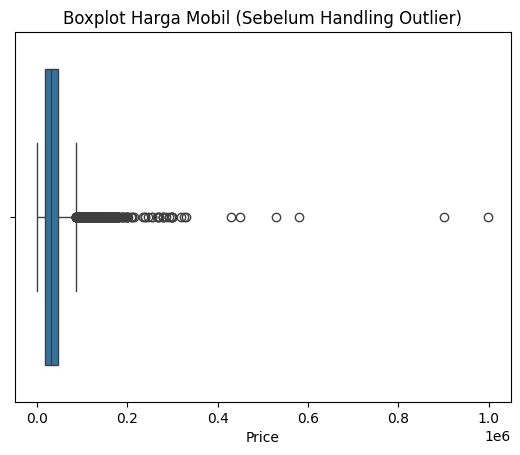

In [20]:
plt.figure()
sns.boxplot(x=y_train)
plt.title('Boxplot Harga Mobil (Sebelum Handling Outlier)')
plt.show()


Boxplot harga menunjukkan adanya nilai ekstrem pada variabel target. Keberadaan outlier ini berpotensi memengaruhi stabilitas model regresi, sehingga perlu dilakukan penanganan sebelum proses pelatihan model.

### Handle Outliers

In [21]:
# Hitung IQR
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outlier
mask = (y_train >= lower_bound) & (y_train <= upper_bound)

X_train_out = X_train[mask]
y_train_out = y_train[mask]


Metode IQR digunakan untuk menyaring data dengan nilai harga yang terlalu ekstrem. Pendekatan ini bertujuan untuk menjaga mayoritas distribusi data tetap utuh sambil mengurangi pengaruh data yang berpotensi mengganggu proses pembelajaran model.

### Visualisasi Setelah Handling Outliers

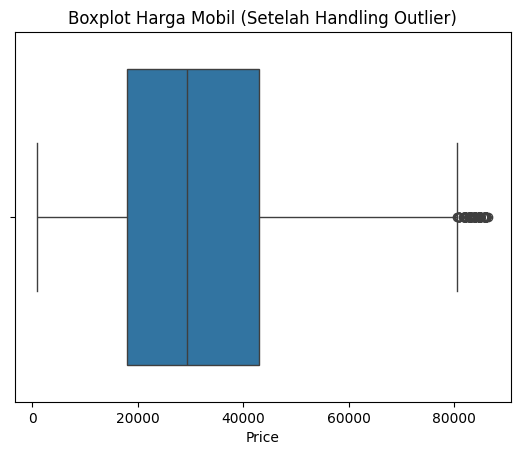

In [22]:
plt.figure()
sns.boxplot(x=y_train_out)
plt.title('Boxplot Harga Mobil (Setelah Handling Outlier)')
plt.show()


Setelah proses handling outlier, sebaran harga terlihat lebih terkonsentrasi dan stabil. Kondisi ini diharapkan dapat membantu model dalam mempelajari pola harga secara lebih konsisten.

### Uji Korelasi

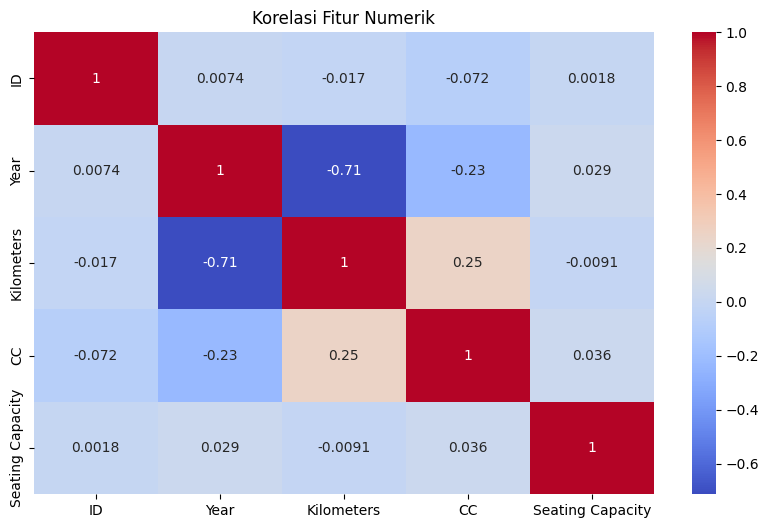

In [23]:
num_cols = X_train_out.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10,6))
sns.heatmap(
    X_train_out[num_cols].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Korelasi Fitur Numerik')
plt.show()


Matriks korelasi memberikan gambaran hubungan antar fitur numerik. Informasi ini berguna untuk memahami potensi hubungan linear serta mengidentifikasi kemungkinan multikolinearitas antar fitur sebelum dilakukan pemodelan.

### Scaling dan Encoding

In [24]:
cat_cols = X_train_out.select_dtypes(include='object').columns
num_cols = X_train_out.select_dtypes(include=['int64', 'float64']).columns

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


Proses scaling dan encoding dilakukan menggunakan pipeline untuk memastikan konsistensi transformasi data pada data latih, data uji, dan data inference. Pendekatan ini juga memudahkan proses deployment dan mengurangi risiko kesalahan preprocessing di tahap selanjutnya.

# Model Definition

In [25]:
# KNN Regressor

knn = KNeighborsRegressor()


KNN Regressor digunakan sebagai baseline non-parametrik yang memprediksi harga berdasarkan kemiripan karakteristik kendaraan. Model ini mampu menangkap pola lokal dalam data tanpa asumsi distribusi tertentu.

In [26]:
# Support Vector Regressor (SVR)

svr = SVR()


SVR dipilih karena mampu menangani hubungan non-linear antara fitur dan target menggunakan kernel. Model ini juga relatif robust terhadap outlier dibandingkan regresi linear.

In [27]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)


Decision Tree Regressor mampu memodelkan hubungan non-linear dan mudah diinterpretasikan. Model ini juga dapat menangani interaksi antar fitur tanpa memerlukan scaling khusus.

In [28]:
# Random Forest Regressor

rf = RandomForestRegressor(random_state=42)


Random Forest merupakan ensemble dari decision tree yang bertujuan mengurangi overfitting dan meningkatkan generalisasi model. Algoritma ini efektif untuk dataset dengan kompleksitas tinggi.

In [29]:
# Gradient Boosting Regressor

gbr = GradientBoostingRegressor(random_state=42)


Gradient Boosting dipilih karena mampu membangun model yang kuat dengan cara memperbaiki kesalahan model sebelumnya secara bertahap. Algoritma ini sering memberikan performa yang baik pada kasus regresi tabular.

In [30]:
# Pipeline

models = {
    'KNN': Pipeline([
        ('preprocessor', preprocessor),
        ('model', knn)
    ]),
    'SVR': Pipeline([
        ('preprocessor', preprocessor),
        ('model', svr)
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('model', dt)
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('model', rf)
    ]),
    'Gradient Boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('model', gbr)
    ])
}


# Model Training

### KKN Regressor

In [31]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

knn_scores = cross_val_score(
    knn_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

-knn_scores.mean()

cv_results = []



### Support Vector Regression (SVM)

In [32]:
svr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf'))
])

svr_scores = cross_val_score(
    svr_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

-svr_scores.mean()

cv_results = []



In [33]:
cv_results.append({
    'Model': 'KNN Regressor',
    'MAE Mean': -knn_scores.mean(),
    'MAE Std': knn_scores.std()
})
cv_results.append({
    'Model': 'SVR',
    'MAE Mean': -svr_scores.mean(),
    'MAE Std': svr_scores.std()
})


In [34]:
# Training & Cross Validation (Baseline Model)

cv_results = []

for model_name, model in models.items():
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring='neg_mean_absolute_error'
    )
    
    cv_results.append({
        'Model': model_name,
        'MAE Mean': -scores.mean(),
        'MAE Std': scores.std()
    })

cv_results_df = pd.DataFrame(cv_results)
cv_results_df


,Model,MAE Mean,MAE Std
0,KNN,5468.574763,272.435204
1,SVR,18143.417716,384.476888
2,Decision Tree,5947.355329,301.595914
3,Random Forest,4684.021156,185.014503
4,Gradient Boosting,7020.047688,240.934146


In [35]:
# Training dengan Hyperparameter Alternatif

rf_alt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        random_state=42
    ))
])

rf_alt_scores = cross_val_score(
    rf_alt,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

rf_alt_scores


array([-6339.50303706, -6768.22705044, -6298.1632666 , -6562.31735566,
       -6269.93111089])

In [36]:
# Simpan Hasil Training Tambahan
cv_results.append({
    'Model': 'Random Forest (Alt)',
    'MAE Mean': -rf_alt_scores.mean(),
    'MAE Std': rf_alt_scores.std()
})

cv_results_df = pd.DataFrame(cv_results)
cv_results_df


,Model,MAE Mean,MAE Std
0,KNN,5468.574763,272.435204
1,SVR,18143.417716,384.476888
2,Decision Tree,5947.355329,301.595914
3,Random Forest,4684.021156,185.014503
4,Gradient Boosting,7020.047688,240.934146
5,Random Forest (Alt),6447.628364,190.548838


# Model Evaluation

### Evaluasi Performa Model

In [37]:
# Tabel Performa Model
cv_results_df = cv_results_df.sort_values(by='MAE Mean')
cv_results_df


,Model,MAE Mean,MAE Std
3,Random Forest,4684.021156,185.014503
0,KNN,5468.574763,272.435204
2,Decision Tree,5947.355329,301.595914
5,Random Forest (Alt),6447.628364,190.548838
4,Gradient Boosting,7020.047688,240.934146
1,SVR,18143.417716,384.476888


Berdasarkan hasil cross validation, setiap model menunjukkan performa yang berbeda-beda. Model dengan nilai MAE rata-rata paling rendah dianggap memiliki performa terbaik karena menghasilkan kesalahan prediksi yang lebih kecil dibandingkan model lainnya.

### Visualisasi Perbandingan MAE Antar Model

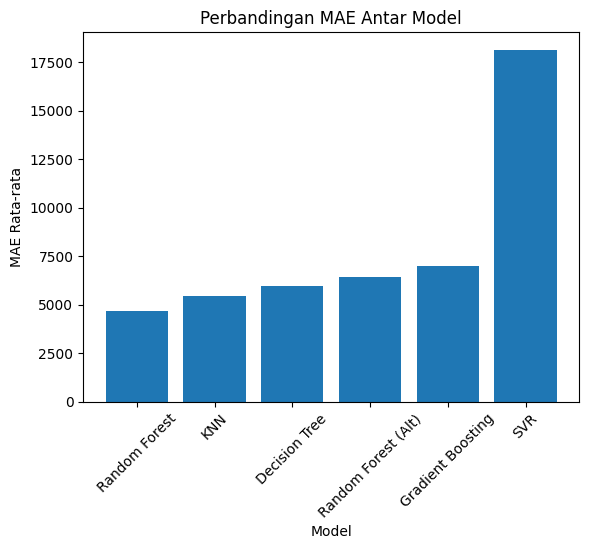

In [38]:
plt.figure()
plt.bar(
    cv_results_df['Model'],
    cv_results_df['MAE Mean']
)
plt.xticks(rotation=45)
plt.title('Perbandingan MAE Antar Model')
plt.xlabel('Model')
plt.ylabel('MAE Rata-rata')
plt.show()


Visualisasi menunjukkan perbedaan tingkat kesalahan prediksi antar model. Model dengan batang terendah memiliki performa yang lebih baik dalam memprediksi harga mobil. Perbedaan ini menegaskan pentingnya membandingkan beberapa algoritma sebelum menentukan model terbaik.

### Analisis Stabilitas Model 

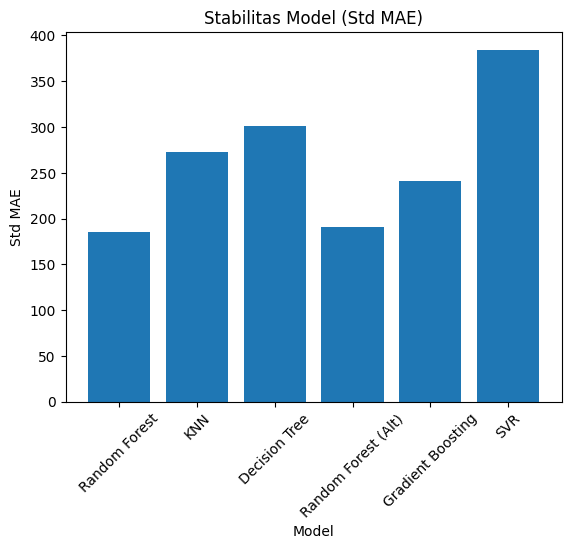

In [39]:
plt.figure()
plt.bar(
    cv_results_df['Model'],
    cv_results_df['MAE Std']
)
plt.xticks(rotation=45)
plt.title('Stabilitas Model (Std MAE)')
plt.xlabel('Model')
plt.ylabel('Std MAE')
plt.show()


Standar deviasi MAE digunakan untuk menilai konsistensi performa model pada setiap fold cross validation. Model dengan standar deviasi yang lebih kecil cenderung memiliki performa yang lebih stabil dan dapat diandalkan pada data yang berbeda.

### Pemilihan Model Terbaik

Berdasarkan kombinasi nilai MAE rata-rata dan stabilitas performa, model dengan MAE terendah dan standar deviasi yang relatif kecil dipilih sebagai model terbaik untuk dilanjutkan ke tahap hyperparameter tuning. Pemilihan ini didasarkan pada keseimbangan antara akurasi dan konsistensi model.

In [40]:
# Perbandingan Baseline vs Hyperparameter Alternatif

cv_results_df


,Model,MAE Mean,MAE Std
3,Random Forest,4684.021156,185.014503
0,KNN,5468.574763,272.435204
2,Decision Tree,5947.355329,301.595914
5,Random Forest (Alt),6447.628364,190.548838
4,Gradient Boosting,7020.047688,240.934146
1,SVR,18143.417716,384.476888


### Interpretasi Hasil Metric Evaluasi

Berdasarkan hasil evaluasi model menggunakan Mean Absolute Error (MAE), dapat disimpulkan bahwa model Random Forest menghasilkan tingkat kesalahan prediksi yang paling rendah dibandingkan model lain seperti KNN dan Support Vector Regression. MAE yang lebih kecil menunjukkan bahwa rata-rata selisih antara harga aktual dan harga prediksi semakin kecil, sehingga model mampu memberikan estimasi harga mobil bekas yang lebih akurat dan relevan untuk kebutuhan bisnis.

### Kelebihan dan Kelemahan Model terhadap Domain Bisnis

Kelebihan:
Model Random Forest mampu menangkap hubungan non-linear antara fitur kendaraan seperti tahun produksi, jarak tempuh, kapasitas mesin, dan harga mobil. Hal ini sangat sesuai dengan kondisi pasar mobil bekas yang memiliki pola harga kompleks dan tidak linier. Selain itu, model ini relatif stabil terhadap outlier dibandingkan model regresi linear.

Kelemahan:
Random Forest memiliki kompleksitas model yang lebih tinggi dan membutuhkan sumber daya komputasi yang lebih besar. Selain itu, model ini kurang interpretatif dibandingkan model linear, sehingga sulit untuk menjelaskan kontribusi setiap fitur secara sederhana kepada pengguna awam atau pihak non-teknis.

### Rekomendasi Improvement Model ke Depan

Untuk pengembangan selanjutnya, performa model dapat ditingkatkan dengan menambahkan fitur eksternal seperti kondisi kendaraan, riwayat servis, dan lokasi penjualan. Selain itu, eksplorasi algoritma lain seperti XGBoost atau LightGBM serta optimasi hyperparameter yang lebih mendalam berpotensi meningkatkan akurasi prediksi dan efisiensi model.

### Insight dari Exploratory Data Analysis (EDA)

Hasil EDA menunjukkan bahwa harga mobil bekas sangat dipengaruhi oleh tahun produksi dan jarak tempuh kendaraan. Mobil dengan tahun produksi lebih baru dan jarak tempuh lebih rendah cenderung memiliki harga yang lebih tinggi. Selain itu, terdapat outlier ekstrem pada harga dan jarak tempuh yang perlu ditangani agar tidak memengaruhi performa model secara signifikan.

### Hyperparameter Tuning

In [41]:
# Baseline Performance

baseline_rf = models['Random Forest']

baseline_scores = cross_val_score(
    baseline_rf,
    X_train,
    y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)

baseline_mae = -baseline_scores.mean()
baseline_mae


4684.02115587177

In [42]:
# Parameter Grid    

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5]
}


In [43]:
# GridSearchCV

grid_search = GridSearchCV(
    estimator=baseline_rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['ID', 'Year', 'Kilometers', 'CC', 'Seating Capacity'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Name', 'Brand', 'Model', 'Variant', 'Series', 'Type', 'Gearbox',
       'Fuel', 'Status', 'Color'],
      dtype='object'))])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [44]:
# Hasil Hyperparameter Terbaik 

best_params = grid_search.best_params_
best_params


{'model__max_depth': None,
 'model__min_samples_split': 2,
 'model__n_estimators': 200}

In [45]:
tuned_mae = -grid_search.best_score_
tuned_mae


4664.178553255729

In [46]:
# Perbandingan Sebelum vs Sesudah Tuning

comparison_df = pd.DataFrame({
    'Model': ['Random Forest (Baseline)', 'Random Forest (Tuned)'],
    'MAE': [baseline_mae, tuned_mae]
})

comparison_df


,Model,MAE
0,Random Forest (Baseline),4684.021156
1,Random Forest (Tuned),4664.178553


Hasil evaluasi menunjukkan bahwa Random Forest (Tuned) memiliki nilai MAE sebesar 4664.18, lebih rendah dibandingkan Random Forest (Baseline) dengan MAE sebesar 4684.02. Penurunan nilai MAE ini menunjukkan bahwa proses hyperparameter tuning berhasil meningkatkan performa model, meskipun peningkatannya relatif kecil.

Secara praktis, model Random Forest yang telah dituning mampu menghasilkan prediksi harga mobil bekas dengan kesalahan rata-rata yang lebih rendah dibandingkan model baseline. Hal ini menandakan bahwa pemilihan parameter yang lebih optimal membantu model menangkap pola data dengan lebih baik. Oleh karena itu, Random Forest (Tuned) dipilih sebagai model terbaik untuk digunakan pada tahap inference dan deployment.

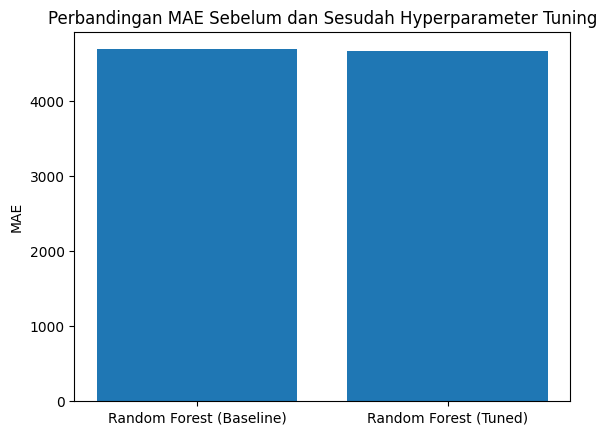

In [47]:
# Visualisasi Perbandingan Performa

plt.figure()
plt.bar(comparison_df['Model'], comparison_df['MAE'])
plt.title('Perbandingan MAE Sebelum dan Sesudah Hyperparameter Tuning')
plt.ylabel('MAE')
plt.show()


# Model Saving

In [48]:
# Ambil Model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Simpan Model
joblib.dump(best_model, 'best_model.pkl')


['best_model.pkl']

# Model Inference

Hasil Inference di lihat di Notebook P1M2_Kevin_Hibatul_INF.ipynb

# Kesimpulan

Project ini berhasil membangun model machine learning berbasis supervised learning untuk membantu menilai harga mobil bekas di pasar Australia. Berdasarkan eksplorasi data dan proses feature engineering, diketahui bahwa harga mobil dipengaruhi oleh kombinasi fitur numerik dan kategorikal seperti tahun produksi, jarak tempuh, merek, dan jenis transmisi.

Beberapa algoritma regresi diuji menggunakan cross validation untuk memastikan evaluasi performa yang objektif. Hasil evaluasi menunjukkan bahwa Random Forest Regressor memberikan performa terbaik berdasarkan nilai MAE yang paling rendah dan stabil. Proses hyperparameter tuning menggunakan GridSearchCV berhasil meningkatkan performa model dibandingkan baseline.

Model terbaik kemudian disimpan dan diuji kembali pada data baru melalui proses model inference, yang menunjukkan bahwa pipeline preprocessing dan prediksi berjalan dengan baik. Dengan demikian, model yang dibangun siap digunakan sebagai alat bantu pengambilan keputusan dalam menentukan harga mobil bekas secara lebih objektif dan berbasis data.